## [03] Spatial Analysis :: Spatial Autorcorrelation
Asst. Prof. Chan, Chun-Hsiang
Department of Geography, National Taiwan Normal University, Taipei, Taiwan.

This is a demo class for spatial autocorrelation, including global Moran's I, local Moran's I, local Getis-Ord statistics, and Bivariate LISA.<br/>
If you have any question about this code, plz feel free to ask me.<br/>
Email: chchan@ntnu.edu.tw
Email: chchan@ntnu.edu.tw<br/>
Website: https://toodou.github.io/<br/>
YouTube: https://www.youtube.com/channel/UC22FsanjPFPeXJtly4qVgYQ

In [1]:
# import packages
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import pygeoda
from libpysal.weights.contiguity import Queen
from pysal.lib import weights
from splot.esda import plot_moran
from esda.moran import Moran
from libpysal.weights.contiguity import Queen
from splot.esda import moran_scatterplot
from splot.esda import plot_moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import lisa_cluster
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv

In [2]:
# set path
os.chdir('臺北市最小統計區圖/')
# import basic statistic area as a basemap
bsa = gpd.read_file('G97_63000_U0200_2015.shp')
# preview the dataset
bsa.head()

U_ID       CODEBASE         CODE1     CODE2   TOWN_ID TOWN COUNTY_ID  \
0  1972  A6310-0024-00  A6310-01-006  A6310-01  63000100  內湖區     63000   
1  1973  A6311-0791-00  A6311-61-005  A6311-61  63000110  士林區     63000   
2  1974  A6311-0787-00  A6311-67-002  A6311-67  63000110  士林區     63000   
3  1975  A6311-0793-00  A6311-62-004  A6311-62  63000110  士林區     63000   
4  1976  A6311-0807-00  A6311-67-008  A6311-67  63000110  士林區     63000   

  COUNTY             X             Y          AREA  \
0    臺北市  310951.84060  2.775913e+06  362112.90727   
1    臺北市  300103.56005  2.776286e+06   17541.31869   
2    臺北市  302742.35826  2.776312e+06    3627.65319   
3    臺北市  302298.08171  2.776278e+06   15430.37397   
4    臺北市  302823.86029  2.776199e+06   52775.40011   

                                            geometry  
0  POLYGON Z ((310568.684 2775912.720 0.000, 3105...  
1  POLYGON Z ((299986.213 2776330.686 0.000, 3000...  
2  POLYGON Z ((302752.204 2776365.558 0.000, 3027...  
3  POLYGON Z ((302336.695 2776362.841 0.000, 3023...  
4  POLYGON Z ((302717.351 2776356.819 0.000, 3027...

In [3]:
# set path
os.chdir('109年電信信令人口統計模擬資料/')
# read mobile signaling population data
sigPOP = pd.read_csv('LOCATION_BASE_DATA.csv')
# preview the dataset
sigPOP.head()

CODEBASE DAY_NIGHT  CNT
0  A6813-0111-00         D    6
1  A6813-0110-00         D   32
2  A6813-0109-00         D   20
3  A6813-0108-00         D   22
4  A6813-0107-00         D   25

In [4]:
# general merge basic statistic area and mobile signaling population
bsa_sigpop_dn = bsa.merge(left_on='CODEBASE', right=sigPOP, right_on='CODEBASE', how='left').reset_index(drop=True)
# preview the dataset
bsa_sigpop_dn.head()

U_ID       CODEBASE         CODE1     CODE2   TOWN_ID TOWN COUNTY_ID  \
0  1972  A6310-0024-00  A6310-01-006  A6310-01  63000100  內湖區     63000   
1  1972  A6310-0024-00  A6310-01-006  A6310-01  63000100  內湖區     63000   
2  1973  A6311-0791-00  A6311-61-005  A6311-61  63000110  士林區     63000   
3  1973  A6311-0791-00  A6311-61-005  A6311-61  63000110  士林區     63000   
4  1974  A6311-0787-00  A6311-67-002  A6311-67  63000110  士林區     63000   

  COUNTY             X             Y          AREA  \
0    臺北市  310951.84060  2.775913e+06  362112.90727   
1    臺北市  310951.84060  2.775913e+06  362112.90727   
2    臺北市  300103.56005  2.776286e+06   17541.31869   
3    臺北市  300103.56005  2.776286e+06   17541.31869   
4    臺北市  302742.35826  2.776312e+06    3627.65319   

                                            geometry DAY_NIGHT  CNT  
0  POLYGON Z ((310568.684 2775912.720 0.000, 3105...         D    1  
1  POLYGON Z ((310568.684 2775912.720 0.000, 3105...         N   45  
2  POLYGON Z ((299986.213 2776330.686 0.000, 3000...         D   27  
3  POLYGON Z ((299986.213 2776330.686 0.000, 3000...         N   22  
4  POLYGON Z ((302752.204 2776365.558 0.000, 3027...         D  426

## Data Preprocessing

In [5]:
# split dataset into day and night
sigD =bsa_sigpop_dn[bsa_sigpop_dn['DAY_NIGHT']=='D'].reset_index(drop=True)
sigN =bsa_sigpop_dn[bsa_sigpop_dn['DAY_NIGHT']=='N'].reset_index(drop=True)

## Weighting Matrix

In [6]:
# w = Queen.from_dataframe(sigD)
w = weights.KNN.from_dataframe(sigD, k=8)
# 
w.transform = 'R'
# calculate global moran's I
moran = Moran(sigD['CNT'], w)
# print moran's I and p values
moran.I, moran.p_sim

(0.2388199353334949, 0.001)

## Global Moran's I

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


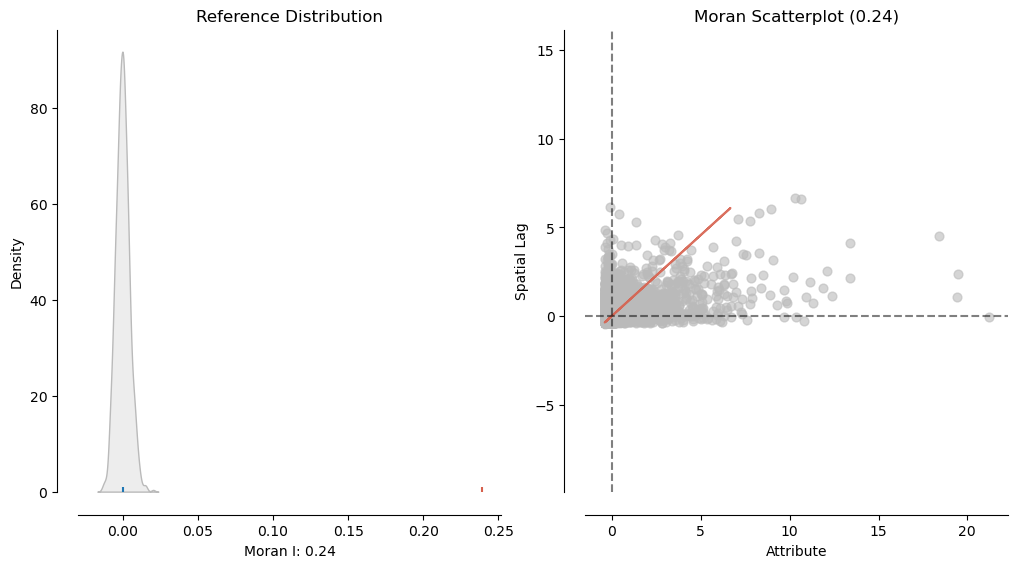

In [7]:
# plot Moran's I results
plot_moran(moran, zstandard=True, figsize=(12,6))
plt.show()

## Local Indicators of Spatial Association – LISA (ESDA & pysal)

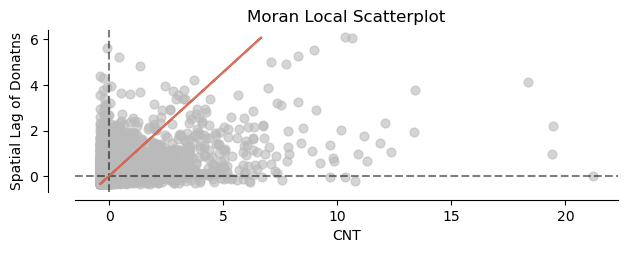

In [8]:
# calculate local moran's I
moran_loc = Moran_Local(sigD['CNT'], w)
# plot local Moran's I scatter plot
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('CNT')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

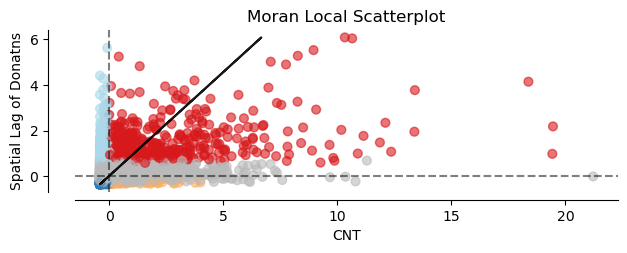

In [9]:
# plot local Moran's I scatter plot with p value threshold (alpha=0.05)
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('CNT')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

<Figure size 2400x3600 with 0 Axes>

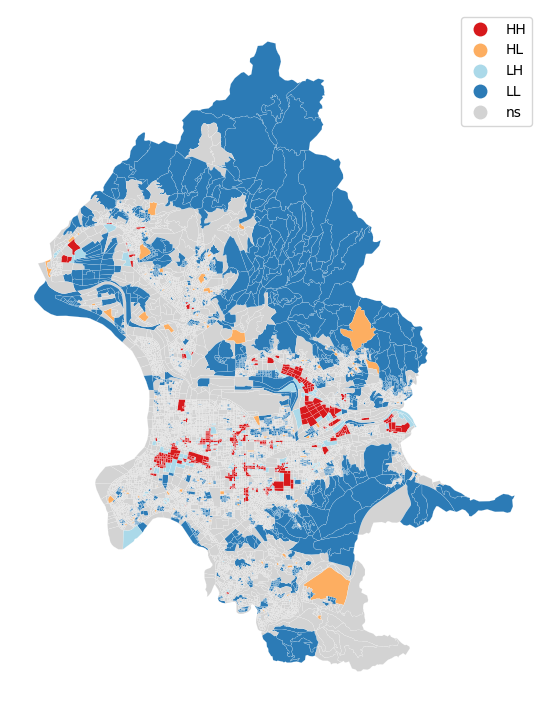

In [10]:
# plot significant local Moran's I cluster
plt.figure(figsize=[8,12], dpi=300)
lisa_cluster(moran_loc, sigD, p=0.05, figsize = (9,9))
plt.show()

## Weighting Matrix (GeoDa)
source: https://pysal.org/notebooks/viz/splot/esda_morans_viz.html

In [11]:
# to pygeoda object
bsa_ga = pygeoda.open(sigD)
# show the dataset
bsa_ga

geoda object:
	 Number of observations: 11490
	 Number of fields: 14
	 Geometry type(s): ('Polygon',)
             field name:      field type (numpy.dtype):
                    U_ID                          int64
                CODEBASE                         object
                   CODE1                         object
                   CODE2                         object
                 TOWN_ID                         object
                    TOWN                         object
               COUNTY_ID                         object
                  COUNTY                         object
                       X                        float64
                       Y                        float64
                    AREA                        float64
                geometry                       geometry
               DAY_NIGHT                         object
                     CNT                          int64

In [12]:
# calculate weighting matrix
dist_thres = pygeoda.min_distthreshold(bsa_ga)
# by using inverse power (1/dist^2)
dist_w = pygeoda.distance_weights(bsa_ga, dist_thres, power=2, is_inverse=True)
# preview the weighting settings
dist_w

Weights Meta-data:
 number of observations:                11490
           is symmetric:                 True
               sparsity: 0.053316396518408936
        # min neighbors:                    1
        # max neighbors:                 1090
       # mean neighbors:    612.6053959965187
     # median neighbors:                597.5
           has isolates:                False

## Local Indicators of Spatial Association – LISA (GeoDa)

In [14]:
# get CNT (day population data)
pop_cnt = sigD['CNT']
# calculate local Moran's I
pop_lisa = pygeoda.local_moran(dist_w, pop_cnt)

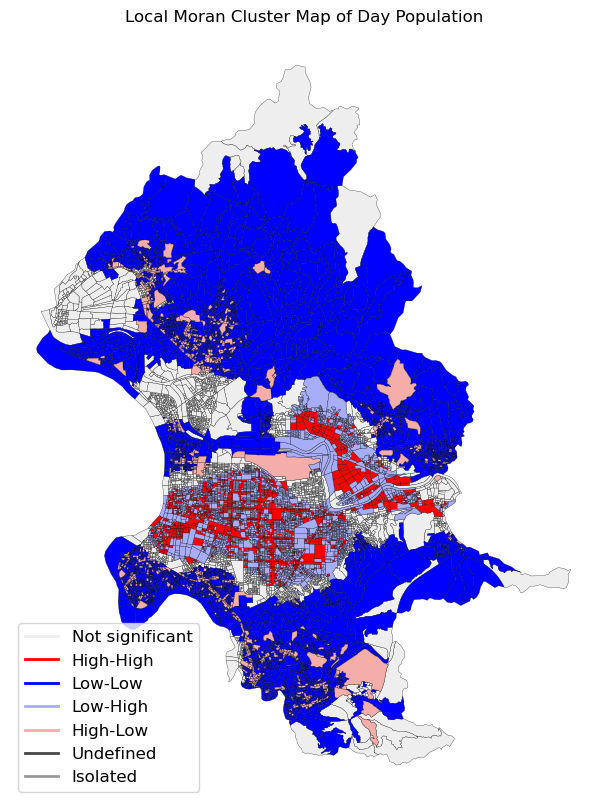

In [15]:
# plot local Moran's I cluster
fig, ax = plt.subplots(figsize = (10,10))
lisa_colors = pop_lisa.lisa_colors()
lisa_labels = pop_lisa.lisa_labels()

# attach LISA cluster indicators to geodataframe
sigD['LISA'] = pop_lisa.lisa_clusters()

for ctype, data in sigD.groupby('LISA'):
    color = lisa_colors[ctype]
    lbl = lisa_labels[ctype]
    data.plot(color = color,
        ax = ax,
        label = lbl,
        edgecolor = 'black',
        linewidth = 0.2)

# place legend in the lower right hand corner of the plot
lisa_legend = [matplotlib.lines.Line2D([0], [0], color=color, lw=2) for color in lisa_colors]
ax.legend(lisa_legend, lisa_labels,loc='lower left', fontsize=12, frameon=True)
ax.set(title='Local Moran Cluster Map of Day Population')
ax.set_axis_off()
plt.show()

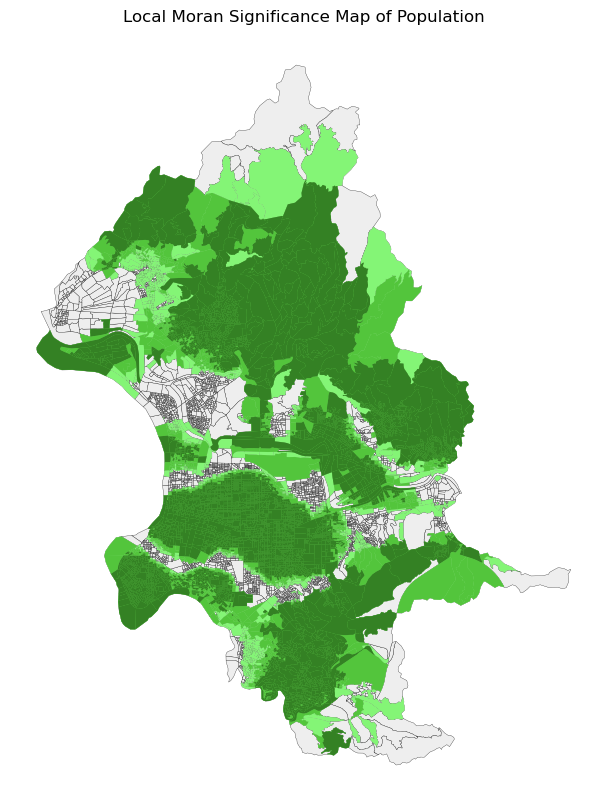

In [16]:
sigD['LISA_PVAL'] = pop_lisa.lisa_pvalues()
fig, ax = plt.subplots(figsize = (10,10))
sigD.plot(color='#eeeeee', ax=ax, edgecolor = 'black', linewidth = 0.2)
sigD[sigD['LISA_PVAL'] <= 0.05].plot(color="#84f576", ax=ax)
sigD[sigD['LISA_PVAL'] <= 0.01].plot(color="#53c53c", ax=ax)
sigD[sigD['LISA_PVAL'] <= 0.001].plot(color="#348124", ax=ax)
ax.set(title='Local Moran Significance Map of Population')
ax.set_axis_off()

## Local Getis-Ord Statistics

In [18]:
# calculate local Getis-Ord Statistics
pop_g = pygeoda.local_g(dist_w, pop_cnt)

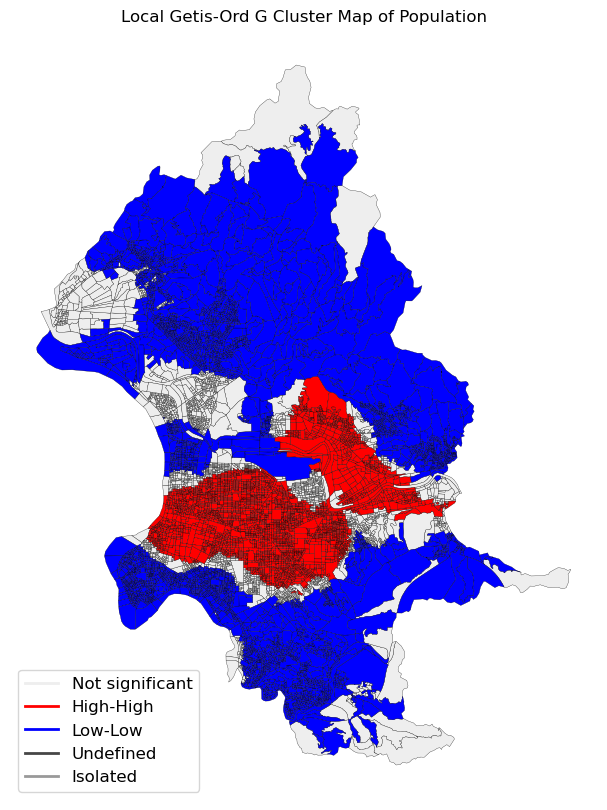

In [19]:
# plot local Getis-Ord Statistics results
fig, ax = plt.subplots(figsize = (10,10))
lisa_colors = pop_g.lisa_colors()
lisa_labels = pop_g.lisa_labels()

# attach LISA cluster indicators to geodataframe
sigD['GO'] = pop_g.lisa_clusters()

for ctype, data in sigD.groupby('GO'):
    color = lisa_colors[ctype]
    lbl = lisa_labels[ctype]
    data.plot(color = color,
        ax = ax,
        label = lbl,
        edgecolor = 'black',
        linewidth = 0.2)

# place legend in the lower right hand corner of the plot
lisa_legend = [matplotlib.lines.Line2D([0], [0], color=color, lw=2) for color in lisa_colors]
ax.legend(lisa_legend, lisa_labels,loc='lower left', fontsize=12, frameon=True)
ax.set(title='Local Getis-Ord G Cluster Map of Population')
ax.set_axis_off()

## Bivariate LISA

In [20]:
# data preprocessing for bivariate LISA (merge day and night population info into the same GeoDataFrame)
sigDN = sigD.merge(left_on=['CODEBASE'], right=sigN[['CODEBASE','CNT']], 
                   right_on=['CODEBASE'], how='left')
sigDN.head(2)

U_ID       CODEBASE         CODE1     CODE2   TOWN_ID TOWN COUNTY_ID  \
0  1972  A6310-0024-00  A6310-01-006  A6310-01  63000100  內湖區     63000   
1  1973  A6311-0791-00  A6311-61-005  A6311-61  63000110  士林區     63000   

  COUNTY             X             Y          AREA  \
0    臺北市  310951.84060  2.775913e+06  362112.90727   
1    臺北市  300103.56005  2.776286e+06   17541.31869   

                                            geometry DAY_NIGHT  CNT_x  LISA  \
0  POLYGON Z ((310568.684 2775912.720 0.000, 3105...         D      1     2   
1  POLYGON Z ((299986.213 2776330.686 0.000, 3000...         D     27     0   

   LISA_PVAL  GO  CNT_y  
0      0.001   2     45  
1      0.163   0     22

In [21]:
# get bivariate values and set weighting matrix
x = sigDN['CNT_x'].values
y = sigDN['CNT_y'].values
w = Queen.from_dataframe(sigD)

# calculate bivariate LISA
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

/var/folders/8d/b_8krth91pb4r1gwzr_my9k00000gn/T/ipykernel_93606/2547244356.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(sigD)


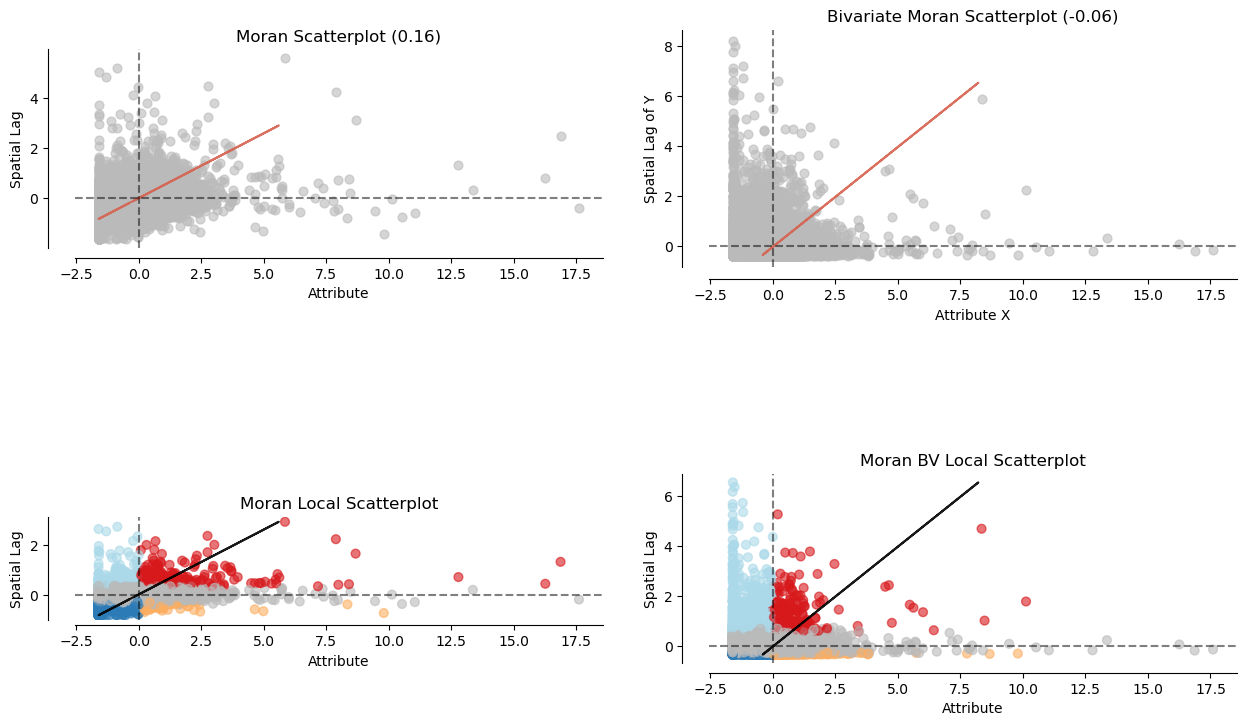

In [22]:
# plot bivariate LISA result
fig, axs = plt.subplots(2, 2, figsize=(15,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:628: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran_bv.sim, shade=shade, color=color, ax=ax, **kwargs)


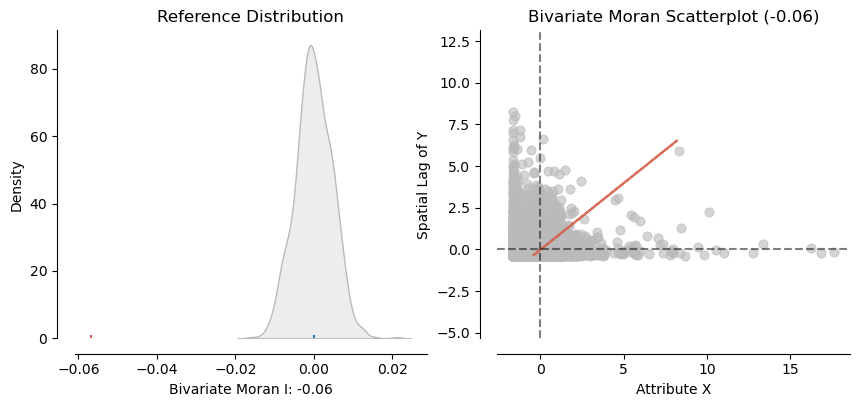

In [23]:
# plot bivariate LISA result
plot_moran_bv(moran_bv)
plt.show()

<Figure size 2400x3600 with 0 Axes>

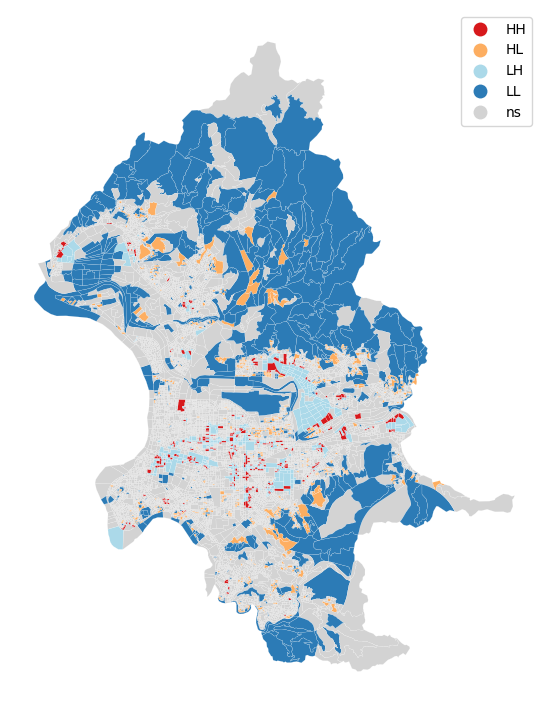

In [24]:
# plot bivariate LISA cluster
plt.figure(figsize=[8,12], dpi=300)
lisa_cluster(moran_loc_bv, sigDN, p=0.05, figsize = (9,9))
plt.show()